In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from cleaning import df

In [2]:
# I am using min-max feature scaling normalization because
# I want to compare player's stats relative to their apex.
def normalize(ls):
    '''Performs min-max feature scaling normalization on a sequence'''
    return [(num - min(ls))/(max(ls)-min(ls)) for num in ls]

In [3]:
# create new dataframe with each players data normalized
# against every season in their career
unique = df['player'].unique()
all_norm_df = pd.DataFrame()
for player in unique:
    pnormdf = pd.DataFrame()
    playerdf = df[df['player'] == player]
    years_in_league = np.array(range(1, len(playerdf)+1))
    for col in playerdf:    
        if playerdf[col].dtypes == np.float64:
            statdf = playerdf[col]
            try:
                normdf = pd.DataFrame({col:normalize(statdf)})
                pnormdf = pd.concat([pnormdf, normdf], axis=1)
            except:
                pass
    pnormdf['allstar'] = playerdf['allstar']
    pnormdf['player'] = player
    pnormdf['years_in_league'] = years_in_league
    all_norm_df = pd.concat([all_norm_df, pnormdf])
all_norm_df.head()

,allstar,ast,blk,drb,efgp,fg,fga,fgp,ft,fta,...,stl,threep,threepa,threepp,tov,trb,twop,twopa,twopp,years_in_league
0,1.0,0.80,1.0000,1.000000,0.838710,1.000000,1.000000,0.838710,0.925926,1.000000,...,1.000000,NaN,NaN,0.0,1.000000,1.000000,1.000000,1.000000,0.837398,1
1,1.0,0.60,0.6875,0.696970,0.911290,0.859649,0.804878,0.911290,0.703704,0.694444,...,1.000000,NaN,NaN,0.0,0.705882,0.714286,0.859649,0.804878,0.910569,2
2,1.0,0.64,0.4375,0.636364,0.830645,0.842105,0.804878,0.830645,0.740741,0.750000,...,0.666667,NaN,NaN,0.0,0.882353,0.666667,0.842105,0.804878,0.829268,3
3,1.0,0.88,0.6250,0.818182,1.000000,0.877193,0.780488,1.000000,0.777778,0.777778,...,1.000000,NaN,NaN,0.0,0.705882,0.809524,0.877193,0.780488,1.000000,4
4,1.0,1.00,0.3125,0.393939,0.717742,0.947368,0.975610,0.717742,1.000000,0.944444,...,1.000000,NaN,NaN,0.0,0.764706,0.380952,0.947368,0.975610,0.715447,5


In [4]:
all_norm_df.columns


Index(['allstar', 'ast', 'blk', 'drb', 'efgp', 'fg', 'fga', 'fgp', 'ft', 'fta',
       'ftp', 'g', 'gs', 'mp', 'orb', 'pf', 'player', 'pts', 'stl', 'threep',
       'threepa', 'threepp', 'tov', 'trb', 'twop', 'twopa', 'twopp',
       'years_in_league'],
      dtype='object')

In [5]:
#rearrange order of dataframe so name and years_in_league are first columns
columns = list(all_norm_df.columns)
columns = ['player', 'years_in_league'] + columns
columns.pop(18)
columns.pop()
all_norm_df = all_norm_df[columns]
all_norm_df = all_norm_df.reset_index(drop=True)
all_norm_df.columns

Index(['player', 'years_in_league', 'allstar', 'ast', 'blk', 'drb', 'efgp',
       'fg', 'fga', 'fgp', 'ft', 'fta', 'ftp', 'g', 'gs', 'mp', 'orb', 'pf',
       'pts', 'stl', 'threep', 'threepa', 'threepp', 'tov', 'trb', 'twop',
       'twopa', 'twopp'],
      dtype='object')

In [6]:
# create individual normalized season sum column
s = [row[2:].sum() for i, row in all_norm_df.iterrows()]
season_sum = pd.DataFrame({'season_sum':s})

In [7]:
# create individual normalized season average column
# the average performance in each statistic
m = [row[2:].mean() for i, row in all_norm_df.iterrows()]
season_mean = pd.DataFrame({'season_mean':m})

In [8]:
statistic_df = pd.concat([all_norm_df[['player', 'years_in_league']],
                          season_sum, season_mean], axis=1)

In [9]:
statistic_df.head(10)

,player,years_in_league,season_sum,season_mean
0,Kareem Abdul-Jabbar,1,19.507410,0.812809
1,Kareem Abdul-Jabbar,2,18.050302,0.752096
2,Kareem Abdul-Jabbar,3,16.901694,0.704237
3,Kareem Abdul-Jabbar,4,19.102475,0.795936
4,Kareem Abdul-Jabbar,5,18.602726,0.775114
5,Kareem Abdul-Jabbar,6,14.262553,0.594273
6,Kareem Abdul-Jabbar,7,10.230297,0.426262
7,Kareem Abdul-Jabbar,8,1.559322,0.064972
8,Michael Jordan,1,14.737351,0.589494
9,Michael Jordan,2,5.414988,0.216600


In [10]:
statistic_df.describe()


,years_in_league,season_sum,season_mean
count,2672.000000,2672.000000,2672.000000
mean,7.226796,13.455716,0.543384
std,4.452106,5.236947,0.211560
min,1.000000,0.000000,0.000000
25%,4.000000,9.996692,0.404535
50%,7.000000,14.395680,0.580985
75%,10.000000,17.554647,0.710124
max,21.000000,23.690476,0.959595


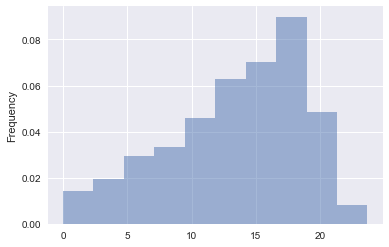

In [11]:
statistic_df['season_sum'].plot(kind='hist', bins=10, alpha=0.5, normed=True)


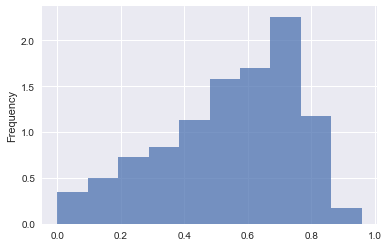

In [12]:
statistic_df['season_mean'].plot(kind='hist', bins=10, alpha=.75, normed=True)

In [13]:
df.head()

,player,href,height,age,tm,lg,pos,g,gs,mp,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,allstar
0,Kareem Abdul-Jabbar,/players/a/abdulka01.html,86.0,34,LAL,NBA,C,76.0,76.0,35.2,...,2.3,6.4,8.7,3.0,0.8,2.7,3.0,2.9,23.9,1
1,Kareem Abdul-Jabbar,/players/a/abdulka01.html,86.0,35,LAL,NBA,C,79.0,79.0,32.3,...,2.1,5.4,7.5,2.5,0.8,2.2,2.5,2.8,21.8,1
2,Kareem Abdul-Jabbar,/players/a/abdulka01.html,86.0,36,LAL,NBA,C,80.0,80.0,32.8,...,2.1,5.2,7.3,2.6,0.7,1.8,2.8,2.6,21.5,1
3,Kareem Abdul-Jabbar,/players/a/abdulka01.html,86.0,37,LAL,NBA,C,79.0,79.0,33.3,...,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,1
4,Kareem Abdul-Jabbar,/players/a/abdulka01.html,86.0,38,LAL,NBA,C,79.0,79.0,33.3,...,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1


# What if I look at how many categories a player exceeds the overall average, and then if they have enough totals above the average, then they are in their prime.

I wanted to set a cutoff for a players performance, so I used the quantile function. I compared every season statistic to the cutoff number and returned True or False.

In [65]:
cutoff =  df.quantile(.75)
cutoff = cutoff.drop(index=['height', 'age', 'g', 'gs', 'mp'])
columns = list(cutoff.index)
cutoff

fg          7.40000
fga        15.70000
fgp         0.50300
threep      1.30000
threepa     3.70000
threepp     0.37100
twop        6.70000
twopa      13.40000
twopp       0.52100
efgp        0.53100
ft          4.30000
fta         5.50000
ftp         0.83925
orb         2.20000
drb         5.52500
trb         7.60000
ast         4.90000
stl         1.40000
blk         0.90000
tov         2.70000
pf          2.80000
pts        19.90000
allstar     1.00000
Name: 0.75, dtype: float64

In [66]:
above = pd.DataFrame()
for col in columns:
    over = df[col] > cutoff[col]
    above = pd.concat([above, over], axis=1)
above.shape

(2672, 23)

In [67]:
sums = pd.DataFrame({'sum':[sum(row) for i, row in above.iterrows()]})
sums = sums.set_index(above.index)
above = pd.concat([above, sums], axis=1)
above.head()

,fg,fga,fgp,threep,threepa,threepp,twop,twopa,twopp,efgp,...,drb,trb,ast,stl,blk,tov,pf,pts,allstar,sum
0,True,True,True,False,False,False,True,True,True,True,...,True,True,False,False,True,True,True,True,False,15
1,True,False,True,False,False,False,True,True,True,True,...,False,False,False,False,True,False,False,True,False,8
2,True,False,True,False,False,False,True,True,True,True,...,False,False,False,False,True,True,False,True,False,9
3,True,False,True,False,False,False,True,True,True,True,...,True,True,False,False,True,False,True,True,False,11
4,True,True,True,False,False,False,True,True,True,True,...,False,False,False,False,True,False,True,True,False,11


In [68]:
above.describe()

,sum
count,2672.000000
mean,5.379117
std,4.203676
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,18.000000


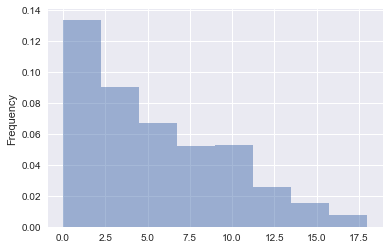

In [90]:
joined = df.join(above, rsuffix='_above')
joined['sum'].plot(kind='hist', bins=8, alpha=.5, normed=True)

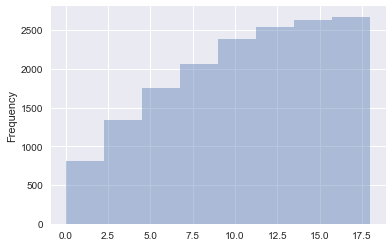

In [91]:
joined['sum'].plot(kind='hist', bins=8, cumulative=True, alpha=.4)


In [96]:
peak_players = joined.loc[:, ['player','age', 'sum']]
peak_players = peak_players[peak_players['sum'] > 8]
peak_players.describe()

,age,sum
count,609.000000,609.000000
mean,26.760263,11.729064
std,3.605779,2.220677
min,19.000000,9.000000
25%,24.000000,10.000000
50%,26.000000,11.000000
75%,29.000000,13.000000
max,39.000000,18.000000


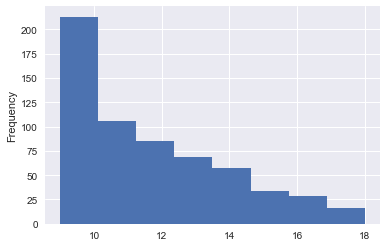

In [95]:
peak_players['sum'].plot(kind='hist', bins=8)